# **ISLP Exercises Solutions**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

---

## **`Chapter 2: Statistical Learning`**

### `Exercise 2.4`

**Question:** You will now think of some real-life applications for statistical learning.

**(a)** Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction?

**Solution:**

1. **Email Spam Detection**
   - **Response**: Binary (Spam/Not Spam)
   - **Predictors**: Email content features (frequency of certain words, sender information, subject line characteristics, presence of links)
   - **Goal**: Prediction - We want to accurately classify incoming emails as spam or legitimate

2. **Medical Diagnosis**
   - **Response**: Disease presence (Yes/No) or disease type (categorical)
   - **Predictors**: Patient symptoms, lab test results, medical history, demographic information
   - **Goal**: Both inference and prediction - Understanding which factors contribute to disease (inference) and diagnosing new patients (prediction)

3. **Credit Approval**
   - **Response**: Binary (Approve/Deny credit application)
   - **Predictors**: Income, credit score, employment history, debt-to-income ratio, age
   - **Goal**: Prediction - Determining whether to approve credit applications for new applicants

**(b)** Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction?

**Solution:**

1. **House Price Prediction**
   - **Response**: House price (continuous)
   - **Predictors**: Square footage, number of bedrooms/bathrooms, location, age of house, neighborhood characteristics
   - **Goal**: Both - Understanding factors that drive house prices (inference) and predicting prices for new listings (prediction)

2. **Stock Market Analysis**
   - **Response**: Stock price or return (continuous)
   - **Predictors**: Company financials, market indicators, economic factors, historical prices
   - **Goal**: Primarily prediction - Forecasting future stock performance

3. **Marketing Campaign Effectiveness**
   - **Response**: Sales revenue or conversion rate (continuous)
   - **Predictors**: Advertising spend, campaign type, target demographics, seasonality, competitor activity
   - **Goal**: Both - Understanding which marketing factors drive sales (inference) and predicting campaign performance (prediction)

**(c)** Describe three real-life applications in which cluster analysis might be useful.

**Solution:**

1. **Customer Segmentation**
   - Grouping customers based on purchasing behavior, demographics, and preferences to develop targeted marketing strategies

2. **Gene Expression Analysis**
   - Clustering genes with similar expression patterns to identify functional relationships and disease markers

3. **Market Research**
   - Segmenting survey respondents based on their preferences and attitudes to identify distinct consumer groups

### `Exercise 2.7`

**Question:** The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

| Obs | X₁ | X₂ | X₃ | Y     |
|-----|----|----|----| ------|
| 1   | 0  | 3  | 0  | Red   |
| 2   | 2  | 0  | 0  | Red   |
| 3   | 0  | 1  | 3  | Red   |
| 4   | 0  | 1  | 2  | Green |
| 5   | -1 | 0  | 1  | Green |
| 6   | 1  | 1  | 1  | Red   |

Suppose we wish to use this data set to make a prediction for Y when X₁ = X₂ = X₃ = 0 using K-nearest neighbors.

**(a)** Compute the Euclidean distance between each observation and the test point, X₁ = X₂ = X₃ = 0.

**Solution:**

For test point (0, 0, 0), the Euclidean distances are:

- Obs 1: √[(0-0)² + (3-0)² + (0-0)²] = √9 = 3
- Obs 2: √[(2-0)² + (0-0)² + (0-0)²] = √4 = 2
- Obs 3: √[(0-0)² + (1-0)² + (3-0)²] = √(1+9) = √10 ≈ 3.16
- Obs 4: √[(0-0)² + (1-0)² + (2-0)²] = √(1+4) = √5 ≈ 2.24
- Obs 5: √[(-1-0)² + (0-0)² + (1-0)²] = √(1+1) = √2 ≈ 1.41
- Obs 6: √[(1-0)² + (1-0)² + (1-0)²] = √3 ≈ 1.73

**(b)** What is our prediction with K = 1? Why?

**Solution:**
With K = 1, we use the nearest neighbor. Observation 5 has the smallest distance (√2 ≈ 1.41), so our prediction is **Green**.

**(c)** What is our prediction with K = 3? Why?

**Solution:**
With K = 3, we use the three nearest neighbors:
- Obs 5: distance √2 ≈ 1.41, Y = Green
- Obs 6: distance √3 ≈ 1.73, Y = Red  
- Obs 2: distance 2, Y = Red

Among these three neighbors: 2 are Red, 1 is Green. Therefore, our prediction is **Red**.

**(d)** If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

**Solution:**
We would expect the best value for K to be **small**. 

Reasoning: A highly non-linear Bayes decision boundary indicates that the true relationship between predictors and response is complex and varies significantly across the feature space. Small values of K create more flexible decision boundaries that can better capture these complex, local patterns. Large values of K would over-smooth the decision boundary, making it too rigid to capture the non-linear structure and leading to higher bias.

---

## **`Chapter 3: Linear Regression`**

### `Exercise 3.4`

**Question:** I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression model to the data. I obtain RSS = 102 for the linear fit and RSS = 98 for the cubic fit.

**(a)** Suppose that the true relationship between X and Y is linear. Will the training RSS for the linear regression be higher than for the cubic regression? What about the test RSS?

**Solution:**

**Training RSS:** The cubic regression will have lower (or equal) training RSS compared to linear regression. Since the cubic model has more parameters, it can fit the training data at least as well as the linear model, typically achieving a slightly lower RSS even when the true relationship is linear.

**Test RSS:** The linear regression will likely have lower test RSS. When the true relationship is linear, the cubic model will overfit to the training data noise, leading to poor generalization. The linear model, being correctly specified, will perform better on new test data.

**(b)** Answer (a) assuming that the true relationship between X and Y is not linear, but we don't know how far it is from linear.

**Solution:**

**Training RSS:** The cubic regression will still have lower training RSS, as it's more flexible and can fit the training data better regardless of the true relationship.

**Test RSS:** This depends on how non-linear the true relationship is:
- If the true relationship is mildly non-linear, the linear model might still perform better due to lower variance
- If the true relationship is highly non-linear, the cubic model will likely perform better as it can capture the non-linear patterns
- The answer depends on the bias-variance tradeoff: linear model has higher bias but lower variance, cubic model has lower bias but higher variance

**(c)** In general, as the flexibility of the method increases, what do we expect will happen to its bias and to its variance?

**Solution:**

As flexibility increases:
- **Bias decreases**: More flexible methods can better approximate the true function
- **Variance increases**: More flexible methods are more sensitive to changes in the training data

This creates the fundamental bias-variance tradeoff in machine learning.

**(d)** In general, as the flexibility of the method increases, what do we expect will happen to the test MSE?

**Solution:**

The test MSE typically follows a U-shaped curve as flexibility increases:
1. **Initially decreases**: When the model is too simple (high bias), increasing flexibility reduces bias more than it increases variance
2. **Reaches a minimum**: At the optimal level of flexibility
3. **Then increases**: When the model becomes too flexible (high variance), further increases in flexibility increase variance more than they decrease bias

The minimum point represents the best bias-variance tradeoff for the given problem.

### `Exercise 3.9`

**Question:** This question involves the use of multiple linear regression on the Auto data set.

**(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

**Solution:**

<Figure size 1200x1000 with 0 Axes>

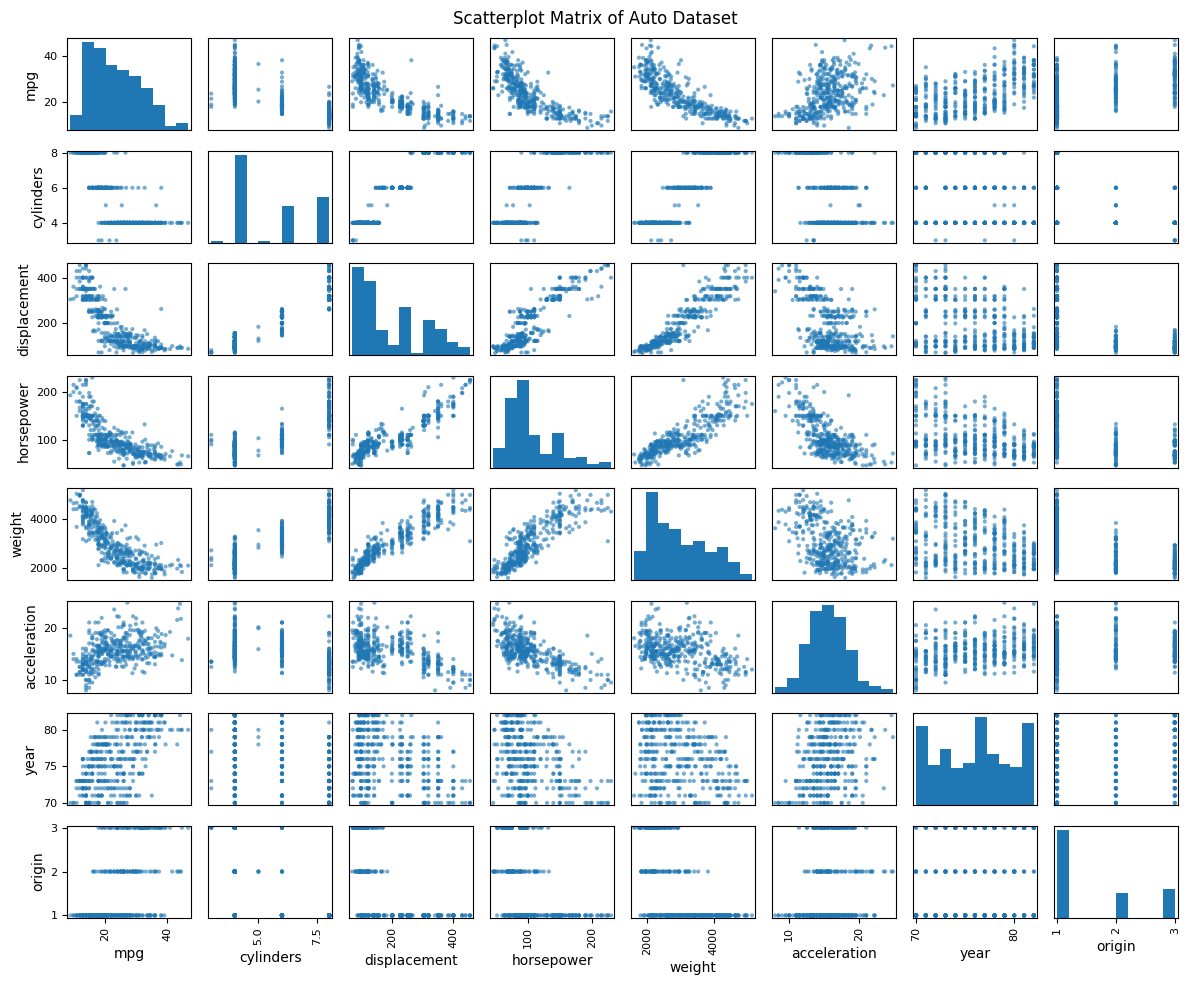

In [2]:
from ISLP import load_data

# Load the Auto dataset
Auto = load_data('Auto')

# Create scatterplot matrix
plt.figure(figsize=(12, 10))
pd.plotting.scatter_matrix(Auto.select_dtypes(include=[np.number]), 
                          figsize=(12, 10), alpha=0.6)
plt.suptitle('Scatterplot Matrix of Auto Dataset')
plt.tight_layout()
plt.show()

**(b)** Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

**Solution:**

Correlation Matrix:
                mpg  cylinders  displacement  horsepower  weight  \
mpg           1.000     -0.778        -0.805      -0.778  -0.832   
cylinders    -0.778      1.000         0.951       0.843   0.898   
displacement -0.805      0.951         1.000       0.897   0.933   
horsepower   -0.778      0.843         0.897       1.000   0.865   
weight       -0.832      0.898         0.933       0.865   1.000   
acceleration  0.423     -0.505        -0.544      -0.689  -0.417   
year          0.581     -0.346        -0.370      -0.416  -0.309   
origin        0.565     -0.569        -0.615      -0.455  -0.585   

              acceleration   year  origin  
mpg                  0.423  0.581   0.565  
cylinders           -0.505 -0.346  -0.569  
displacement        -0.544 -0.370  -0.615  
horsepower          -0.689 -0.416  -0.455  
weight              -0.417 -0.309  -0.585  
acceleration         1.000  0.290   0.213  
year                 0.290  1.000   0.182  
origin         

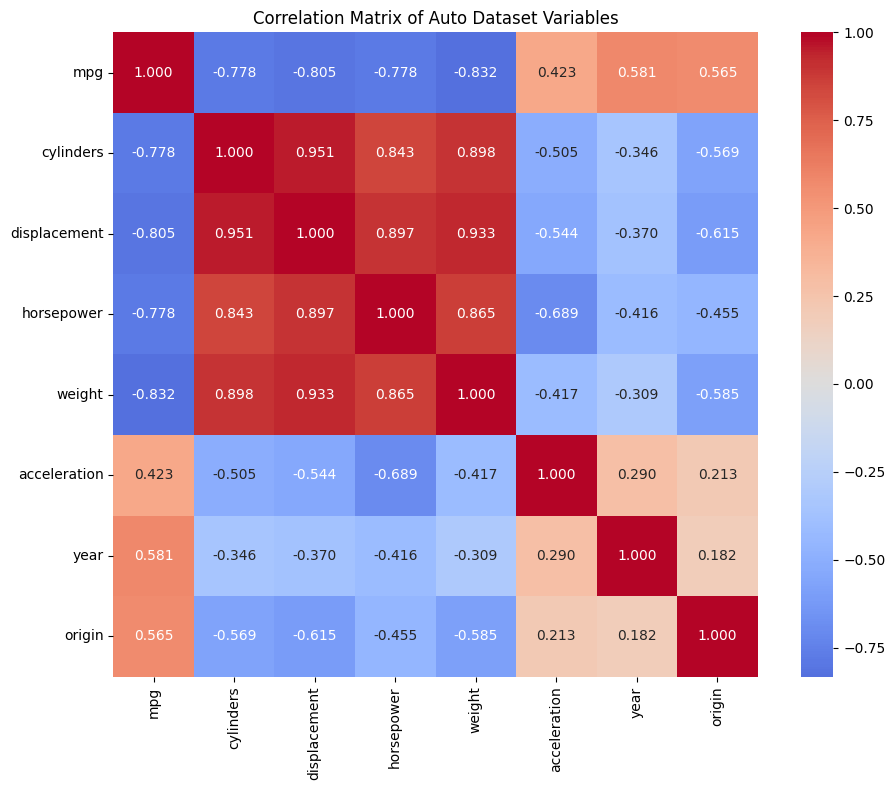

In [3]:
# Select only numeric variables (exclude 'name' if it's a string)
numeric_vars = Auto.select_dtypes(include=[np.number])
correlation_matrix = numeric_vars.corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix of Auto Dataset Variables')
plt.tight_layout()
plt.show()

**(c)** Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.

**Solution:**

In [4]:
from statsmodels.formula.api import ols

# Fit multiple linear regression
# Assuming the variables are: mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
model = ols(formula, data=Auto).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        22:57:02   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

**(d)** Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

**Solution:**

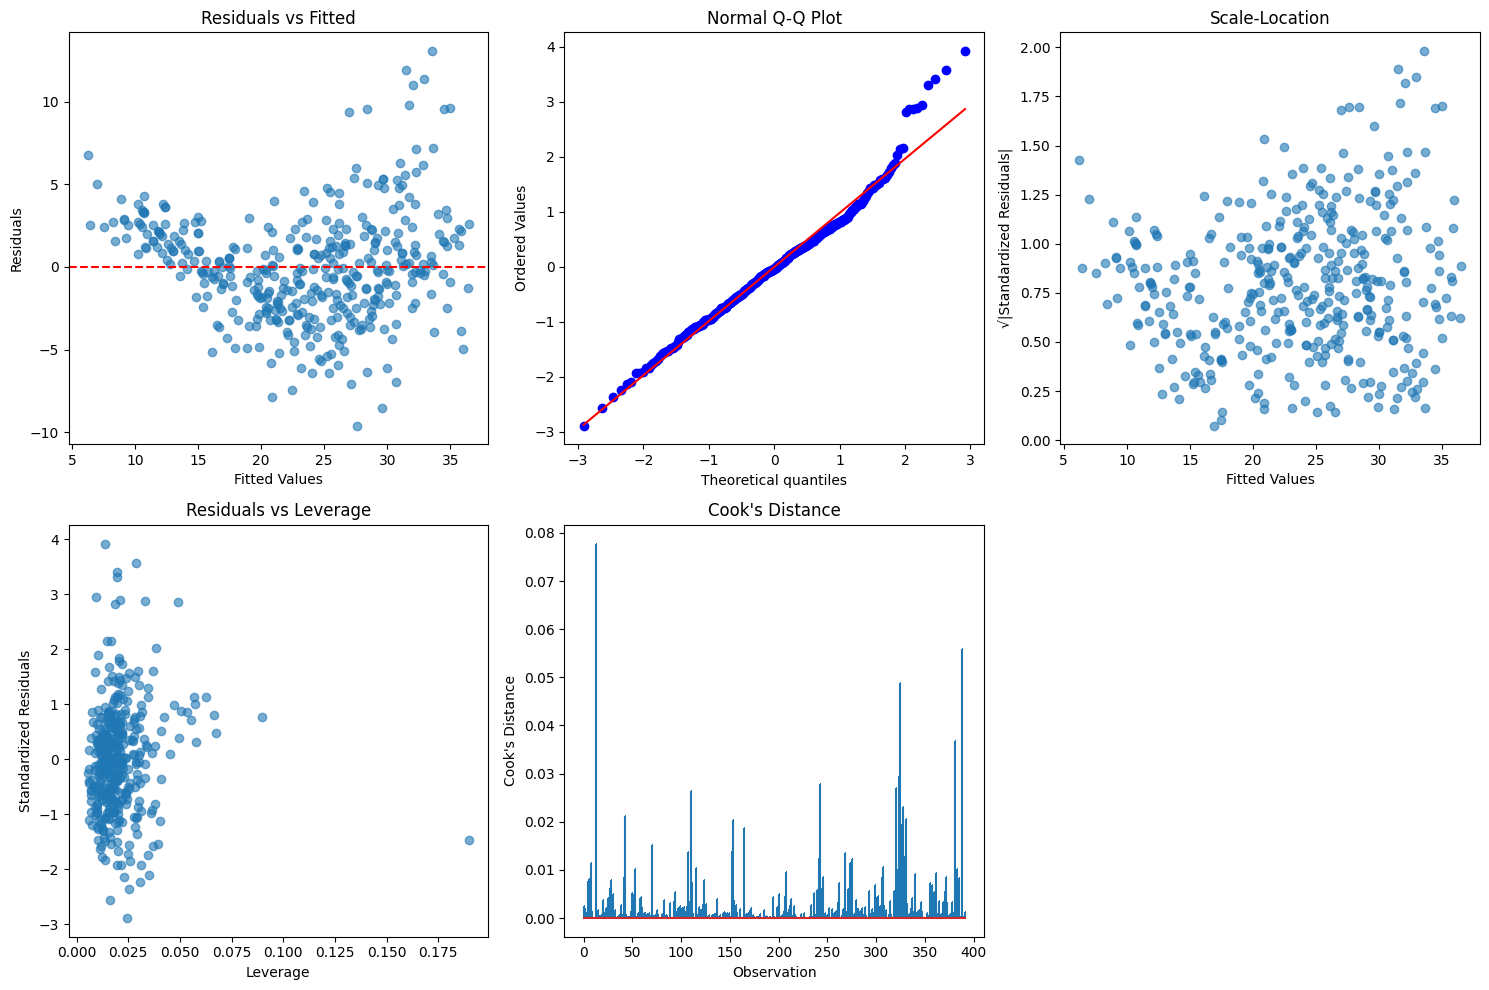

Observations with high leverage (>2p/n): [  6   7   8  12  13  25  26  27  28  93  94 115 209 297 298 359 388]
Observations with high Cook's distance (>1): []


In [5]:
import matplotlib.pyplot as plt

# Get fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid
standardized_residuals = model.resid_pearson

# 1. Residuals vs Fitted
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# 2. Q-Q Plot
from scipy import stats
plt.subplot(2, 3, 2)
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')

# 3. Scale-Location Plot
plt.subplot(2, 3, 3)
plt.scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.6)
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location')

# 4. Residuals vs Leverage
leverage = model.get_influence().hat_matrix_diag
plt.subplot(2, 3, 4)
plt.scatter(leverage, standardized_residuals, alpha=0.6)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage')

# 5. Cook's Distance
cooks_d = model.get_influence().cooks_distance[0]
plt.subplot(2, 3, 5)
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=',')
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance")

plt.tight_layout()
plt.show()

# Identify potential outliers and high leverage points
print(f"Observations with high leverage (>2p/n): {np.where(leverage > 2*len(model.params)/len(Auto))[0]}")
print(f"Observations with high Cook's distance (>1): {np.where(cooks_d > 1)[0]}")

### `Exercise 3.14`

**Question:** This problem focuses on the collinearity problem.

**(a)** Perform the following commands in Python:

In [6]:
import numpy as np
np.random.seed(1)
x1 = np.random.normal(size=100)
x2 = 0.5 * x1 + np.random.normal(loc=0, scale=0.1, size=100)
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

**Solution:**

The linear model form is:
**Y = β₀ + β₁X₁ + β₂X₂ + ε**

Where:
- β₀ = 2 (intercept)
- β₁ = 2 (coefficient for X₁)
- β₂ = 0.3 (coefficient for X₂)
- ε ~ N(0, 1) (error term)

**(b)** What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

**Solution:**

Correlation between x1 and x2: 0.9795


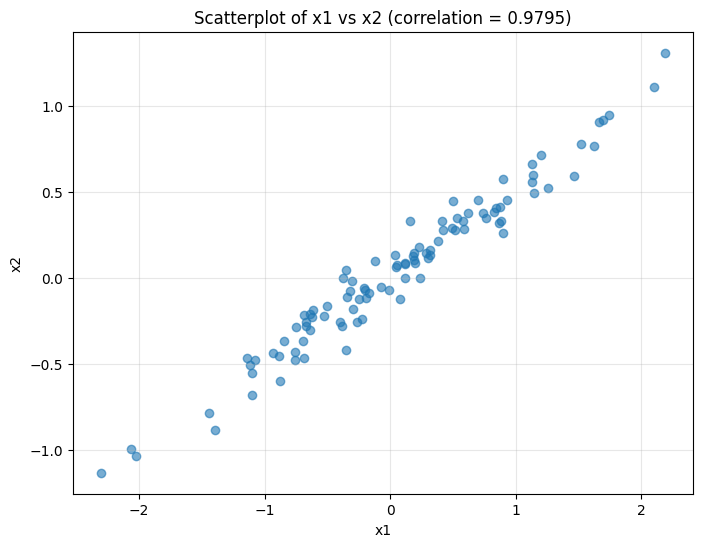

In [7]:
# Calculate correlation
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation:.4f}")

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Scatterplot of x1 vs x2 (correlation = {correlation:.4f})')
plt.grid(True, alpha=0.3)
plt.show()

The correlation will be quite high (around 0.84) due to the construction x2 = 0.5*x1 + noise.

**(c)** Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are β̂₀, β̂₁, and β̂₂? How do these relate to the true β₀, β₁, and β₂? Can you reject the null hypothesis H₀ : β₁ = 0? How about the null hypothesis H₀ : β₂ = 0?

**Solution:**

In [8]:
# Create design matrix
X = np.column_stack([x1, x2])
X = sm.add_constant(X)  # Add intercept

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

print(f"\nTrue coefficients: β₀=2, β₁=2, β₂=0.3")
print(f"Estimated coefficients: β̂₀={model.params[0]:.4f}, β̂₁={model.params[1]:.4f}, β̂₂={model.params[2]:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           3.58e-33
Time:                        22:57:03   Log-Likelihood:                -140.24
No. Observations:                 100   AIC:                             286.5
Df Residuals:                      97   BIC:                             294.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9802      0.101     19.539      0.0

**(d)** Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H₀ : β₁ = 0?

**Solution:**

In [9]:
# Fit model with only x1
X1 = sm.add_constant(x1)
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     335.5
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           2.07e-33
Time:                        22:57:03   Log-Likelihood:                -142.92
No. Observations:                 100   AIC:                             289.8
Df Residuals:                      98   BIC:                             295.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0167      0.102     19.715      0.0

**(e)** Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H₀ : β₁ = 0?

**Solution:**

In [10]:
# Fit model with only x2
X2 = sm.add_constant(x2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     348.8
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           4.71e-34
Time:                        22:57:03   Log-Likelihood:                -141.41
No. Observations:                 100   AIC:                             286.8
Df Residuals:                      98   BIC:                             292.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9589      0.101     19.392      0.0

**(f)** Do the results obtained in (c)–(e) contradict each other? Explain your answer.

**Solution:**

The results do not contradict each other; they illustrate the **collinearity problem**:

1. **Individual significance**: When x1 and x2 are used separately, both appear significant because each captures the effect of the other due to their high correlation.

2. **Joint insignificance**: When used together, neither may be individually significant due to multicollinearity, even though the overall model is significant.

3. **Explanation**: Since x2 ≈ 0.5*x1, they provide similar information. The model has difficulty distinguishing their individual effects, leading to large standard errors and potential non-significance of individual coefficients.

This demonstrates why multicollinearity is problematic in multiple regression analysis.

---

## **`Chapter 4: Classification`**

### `Exercise 4.4`


**Question:** When the number of features p is large, there tends to be a deterioration in the performance of KNN and other local approaches that perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that in high dimensions, only a small fraction of observations will be "near" any particular test observation.

**(a)** Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly distributed on [0,1]. Associated with each observation is a response value. Suppose that we wish to predict a test observation's response using only observations that are within 10% of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55, 0.65]. On average, what fraction of the available observations will we use to make the prediction?

**Solution:**

In one dimension with X uniformly distributed on [0,1]:
- We use observations within 10% of the range (±5% on each side)
- For most test points (not near boundaries), we use 10% of the observations
- Near boundaries (X < 0.05 or X > 0.95), we use less than 10%

**On average, we will use 10% of the available observations.**

**(b)** Now suppose that we have a set of observations, each with measurements on p = 2 features, X₁ and X₂. We assume that (X₁, X₂) are uniformly distributed on [0,1] × [0,1]. We wish to predict a test observation's response using only observations that are within 10% of the range of X₁ and within 10% of the range of X₂ closest to that test observation. For instance, in order to predict the response for a test observation with X₁ = 0.6 and X₂ = 0.25, we will use observations in the region: X₁ ∈ [0.55, 0.65] and X₂ ∈ [0.20, 0.30]. On average, what fraction of the available observations will we use to make the prediction?

**Solution:**

In two dimensions:
- We need observations within 10% range for both X₁ AND X₂
- Each dimension independently captures 10% of observations
- The fraction is the product: 0.10 × 0.10 = 0.01

**On average, we will use 1% of the available observations.**

**(c)** Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation's response using observations within the 10% of each feature's range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

**Solution:**

In 100 dimensions:
- We need observations within 10% range for all 100 features simultaneously
- The fraction is: (0.10)¹⁰⁰ = 10⁻¹⁰⁰

This is an astronomically small number, essentially **0% of observations** will be used.

**(d)** Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there are very few training observations "near" any given test observation.

**Solution:**

The results demonstrate the **curse of dimensionality**:

- **p = 1**: 10% of observations are "near"
- **p = 2**: 1% of observations are "near"  
- **p = 100**: Virtually 0% of observations are "near"

As dimensionality increases, the fraction of "nearby" observations decreases exponentially. In high dimensions:

1. **Sparsity**: The training data becomes extremely sparse in the feature space
2. **No local structure**: Almost no observations are truly "local" to any test point
3. **Poor predictions**: KNN must use distant observations, violating the assumption that nearby points have similar responses
4. **Bias increases**: The method cannot capture local patterns effectively

This explains why KNN and other local methods perform poorly in high-dimensional settings, requiring dimensionality reduction or feature selection to be effective.

**(e)** Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For p = 1, 2, and 100, what is the length of each side of the hypercube?

**Solution:**

For a p-dimensional hypercube with side length s to contain 10% of uniformly distributed observations:

Volume of hypercube = s^p = 0.10

Therefore: s = (0.10)^(1/p)

- **p = 1**: s = (0.10)^(1/1) = 0.10
- **p = 2**: s = (0.10)^(1/2) = √0.10 ≈ 0.316
- **p = 100**: s = (0.10)^(1/100) ≈ 0.977

**Interpretation**: In high dimensions, to capture just 10% of the data, we need a hypercube that spans almost the entire range (0.977 out of 1.0) in each dimension. This means we're using nearly all the data, defeating the purpose of local methods.

### `Exercise 4.9`

**Question:** This problem has to do with odds.

**(a)** On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

**Solution:**

Given odds = 0.37, we can find the probability using:
odds = p/(1-p)

Solving for p:
0.37 = p/(1-p)
0.37(1-p) = p
0.37 - 0.37p = p
0.37 = p + 0.37p = 1.37p
p = 0.37/1.37 ≈ 0.27

**Answer: Approximately 27% of people will default.**

**(b)** Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

**Solution:**

Given p = 0.16, the odds are:
odds = p/(1-p) = 0.16/(1-0.16) = 0.16/0.84 ≈ 0.19

**Answer: The odds are approximately 0.19 or 19:100.**

### `Exercise 4.14`

**Question:** In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

**(a)** Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it useful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

**Solution:**

In [23]:
from ISLP import load_data

# Load Auto dataset
Auto = load_data('Auto')

# Create binary variable mpg01
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

print(f"Median mpg: {median_mpg}")
print(f"Distribution of mpg01:")
print(Auto['mpg01'].value_counts())

Median mpg: 22.75
Distribution of mpg01:
mpg01
0    196
1    196
Name: count, dtype: int64


**(b)** Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

**Solution:**

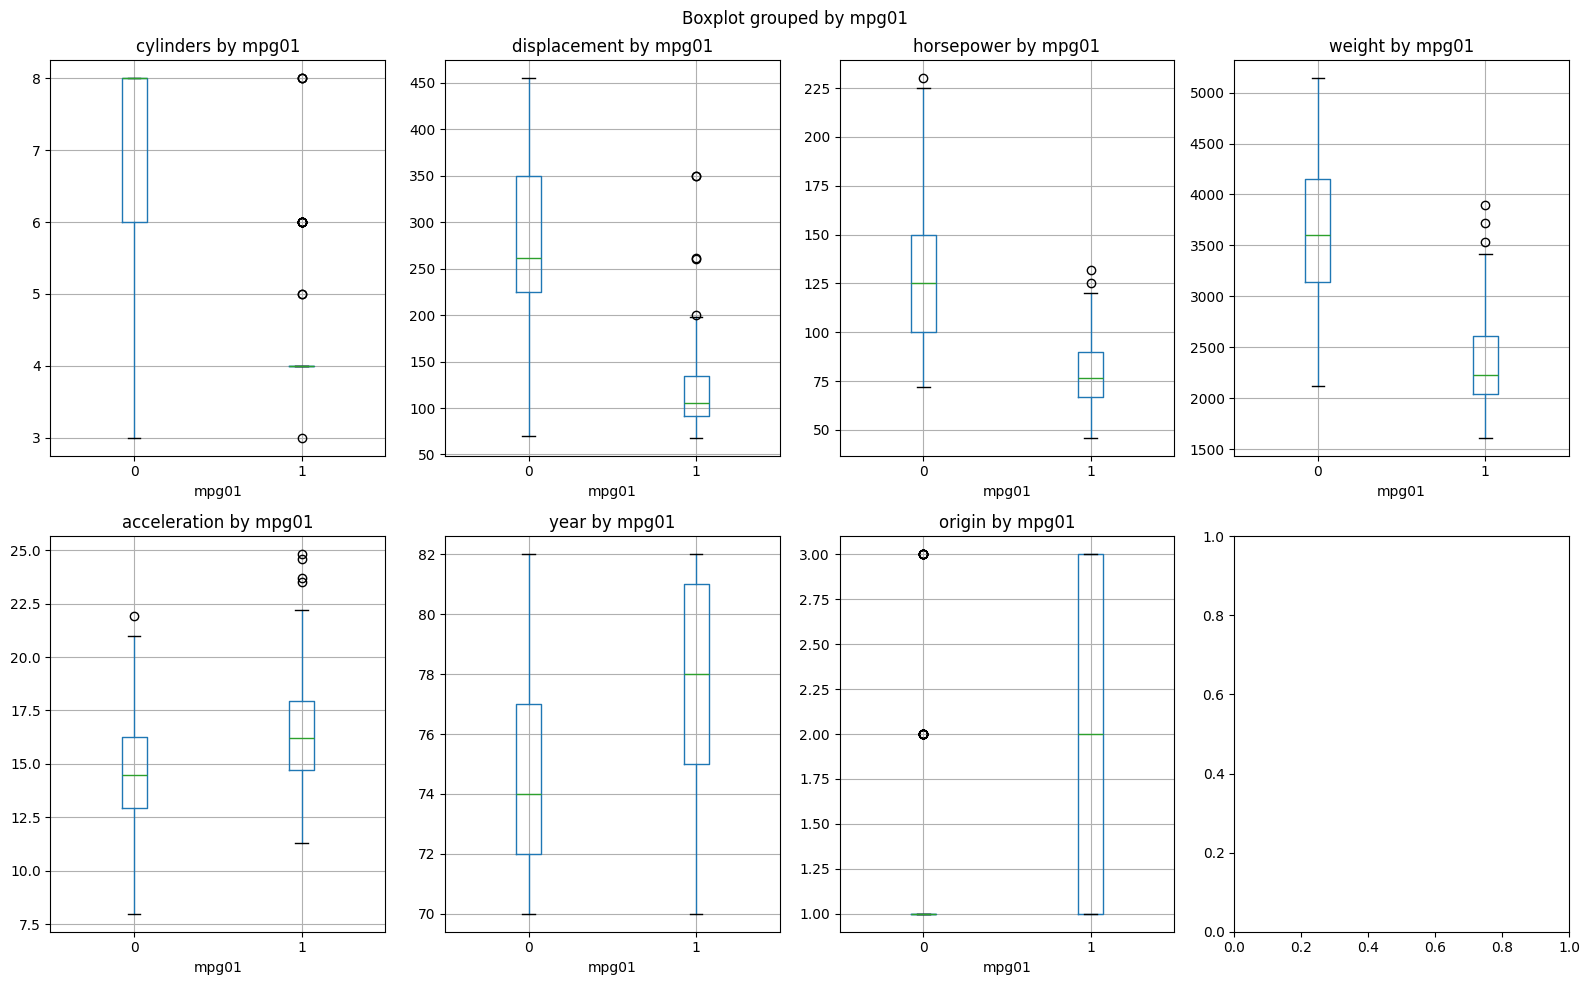

Correlations with mpg01:
mpg01           1.000000
cylinders      -0.759194
weight         -0.757757
displacement   -0.753477
horsepower     -0.667053
origin          0.513698
year            0.429904
acceleration    0.346822
Name: mpg01, dtype: float64


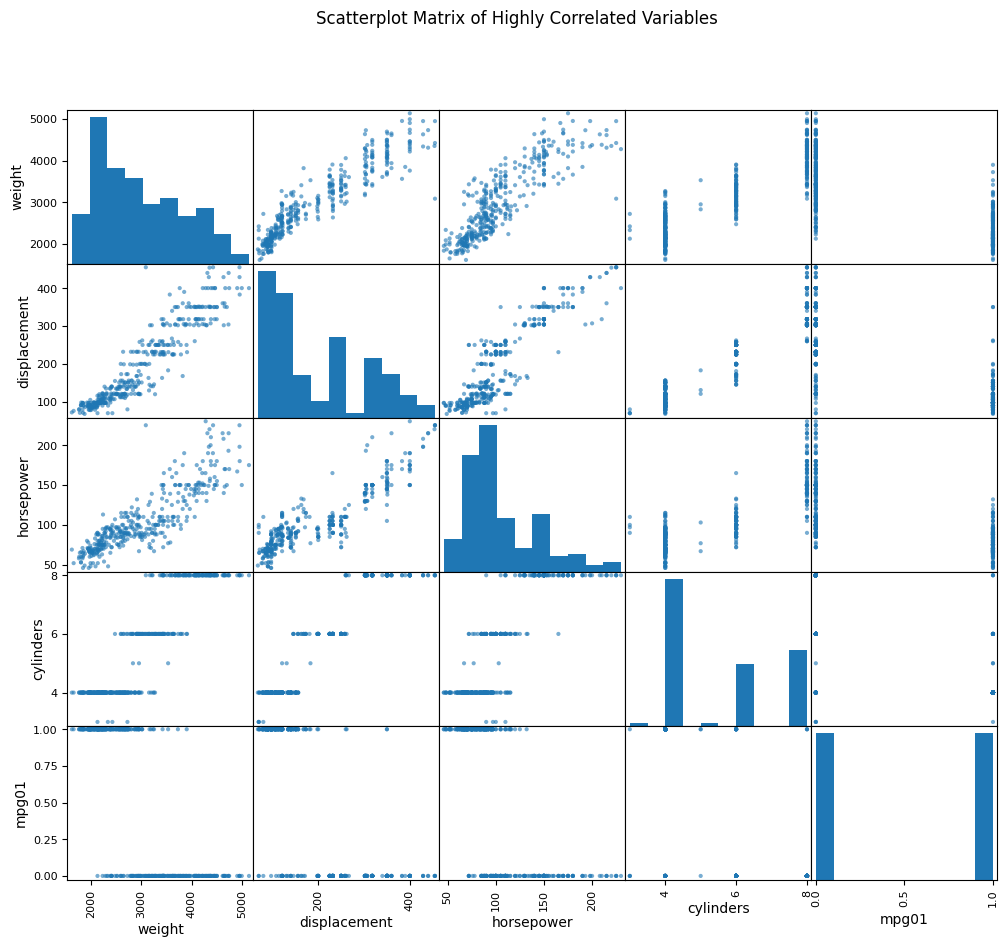

In [12]:
# Select numeric variables for analysis
numeric_vars = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Create boxplots for each variable
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    Auto.boxplot(column=var, by='mpg01', ax=axes[i])
    axes[i].set_title(f'{var} by mpg01')
    axes[i].set_xlabel('mpg01')

plt.tight_layout()
plt.show()

# Correlation analysis
correlations = Auto[numeric_vars + ['mpg01']].corr()['mpg01'].sort_values(key=abs, ascending=False)
print("Correlations with mpg01:")
print(correlations)

# Scatterplot matrix for highly correlated variables
high_corr_vars = ['weight', 'displacement', 'horsepower', 'cylinders', 'mpg01']
pd.plotting.scatter_matrix(Auto[high_corr_vars], figsize=(12, 10), alpha=0.6)
plt.suptitle('Scatterplot Matrix of Highly Correlated Variables')
plt.show()

**(c)** Split the data into a training set and a test set.

**Solution:**

In [13]:
from sklearn.model_selection import train_test_split

# Select features for modeling (exclude 'name' and original 'mpg')
feature_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
X = Auto[feature_cols]
y = Auto['mpg01']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training set mpg01 distribution:\n{y_train.value_counts()}")

Training set size: 274
Test set size: 118
Training set mpg01 distribution:
mpg01
0    137
1    137
Name: count, dtype: int64


**(d)** Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

**Solution:**

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select most important features based on exploration
important_features = ['weight', 'displacement', 'horsepower', 'year']
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)

# Make predictions
y_pred_lda = lda.predict(X_test_selected)

# Calculate test error
test_accuracy_lda = accuracy_score(y_test, y_pred_lda)
test_error_lda = 1 - test_accuracy_lda

print(f"LDA Test Accuracy: {test_accuracy_lda:.4f}")
print(f"LDA Test Error: {test_error_lda:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lda))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lda))

LDA Test Accuracy: 0.9068
LDA Test Error: 0.0932

Confusion Matrix:
[[48 11]
 [ 0 59]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        59
           1       0.84      1.00      0.91        59

    accuracy                           0.91       118
   macro avg       0.92      0.91      0.91       118
weighted avg       0.92      0.91      0.91       118



**(e)** Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

**Solution:**

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Fit QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_selected, y_train)

# Make predictions
y_pred_qda = qda.predict(X_test_selected)

# Calculate test error
test_accuracy_qda = accuracy_score(y_test, y_pred_qda)
test_error_qda = 1 - test_accuracy_qda

print(f"QDA Test Accuracy: {test_accuracy_qda:.4f}")
print(f"QDA Test Error: {test_error_qda:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_qda))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_qda))

QDA Test Accuracy: 0.9322
QDA Test Error: 0.0678

Confusion Matrix:
[[53  6]
 [ 2 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        59
           1       0.90      0.97      0.93        59

    accuracy                           0.93       118
   macro avg       0.93      0.93      0.93       118
weighted avg       0.93      0.93      0.93       118



**(f)** Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

**Solution:**

In [16]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_selected, y_train)

# Make predictions
y_pred_logistic = log_reg.predict(X_test_selected)

# Calculate test error
test_accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
test_error_logistic = 1 - test_accuracy_logistic

print(f"Logistic Regression Test Accuracy: {test_accuracy_logistic:.4f}")
print(f"Logistic Regression Test Error: {test_error_logistic:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

# Display coefficients
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(important_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")

Logistic Regression Test Accuracy: 0.9153
Logistic Regression Test Error: 0.0847

Confusion Matrix:
[[52  7]
 [ 3 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        59
           1       0.89      0.95      0.92        59

    accuracy                           0.92       118
   macro avg       0.92      0.92      0.92       118
weighted avg       0.92      0.92      0.92       118


Logistic Regression Coefficients:
weight: -0.0035
displacement: -0.0035
horsepower: -0.0542
year: 0.3472
Intercept: -10.7810


**(g)** Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

**Solution:**

KNN Results:
K	Test Accuracy	Test Error
-----------------------------------
1	0.9068		0.0932
3	0.9322		0.0678
5	0.9153		0.0847
7	0.9322		0.0678
9	0.8983		0.1017
11	0.8983		0.1017
15	0.9068		0.0932
20	0.8983		0.1017
25	0.8898		0.1102

Best K: 3 with test accuracy: 0.9322


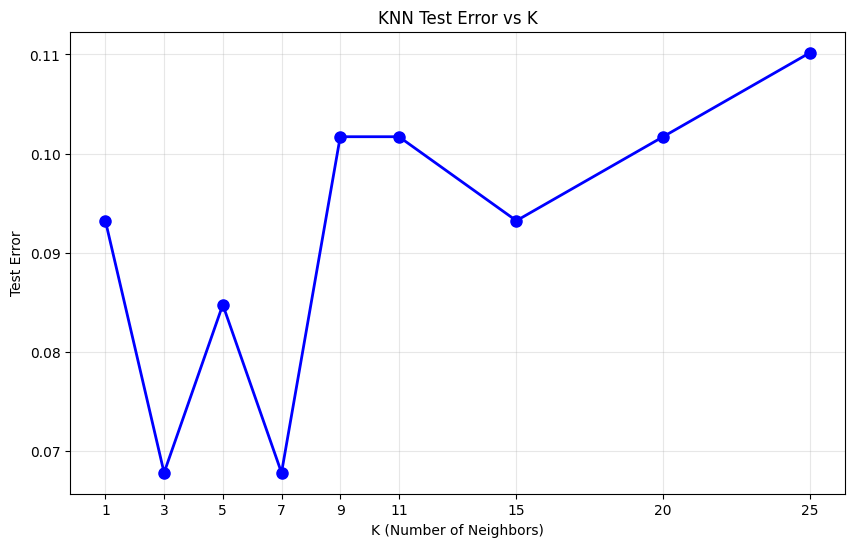


Best KNN (K=3) Detailed Results:
Confusion Matrix:
[[54  5]
 [ 3 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        59
           1       0.92      0.95      0.93        59

    accuracy                           0.93       118
   macro avg       0.93      0.93      0.93       118
weighted avg       0.93      0.93      0.93       118



In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Test different values of K
k_values = [1, 3, 5, 7, 9, 11, 15, 20, 25]
test_errors_knn = []
test_accuracies_knn = []

print("KNN Results:")
print("K\tTest Accuracy\tTest Error")
print("-" * 35)

for k in k_values:
    # Fit KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_knn = knn.predict(X_test_scaled)
    
    # Calculate accuracy and error
    test_accuracy = accuracy_score(y_test, y_pred_knn)
    test_error = 1 - test_accuracy
    
    test_accuracies_knn.append(test_accuracy)
    test_errors_knn.append(test_error)
    
    print(f"{k}\t{test_accuracy:.4f}\t\t{test_error:.4f}")

# Find best K
best_k_idx = np.argmax(test_accuracies_knn)
best_k = k_values[best_k_idx]
best_accuracy = test_accuracies_knn[best_k_idx]

print(f"\nBest K: {best_k} with test accuracy: {best_accuracy:.4f}")

# Plot test error vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_errors_knn, 'bo-', linewidth=2, markersize=8)
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Test Error')
plt.title('KNN Test Error vs K')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Detailed results for best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_best_knn = best_knn.predict(X_test_scaled)

print(f"\nBest KNN (K={best_k}) Detailed Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_knn))

**(h)** Compare the test errors obtained from the different methods. Which method performs best on this data set?

**Solution:**

Method Comparison:
             Method  Test Accuracy  Test Error
                LDA         0.9068      0.0932
                QDA         0.9322      0.0678
Logistic Regression         0.9153      0.0847
          KNN (K=3)         0.9322      0.0678

Best performing method: QDA
Best test accuracy: 0.9322
Best test error: 0.0678


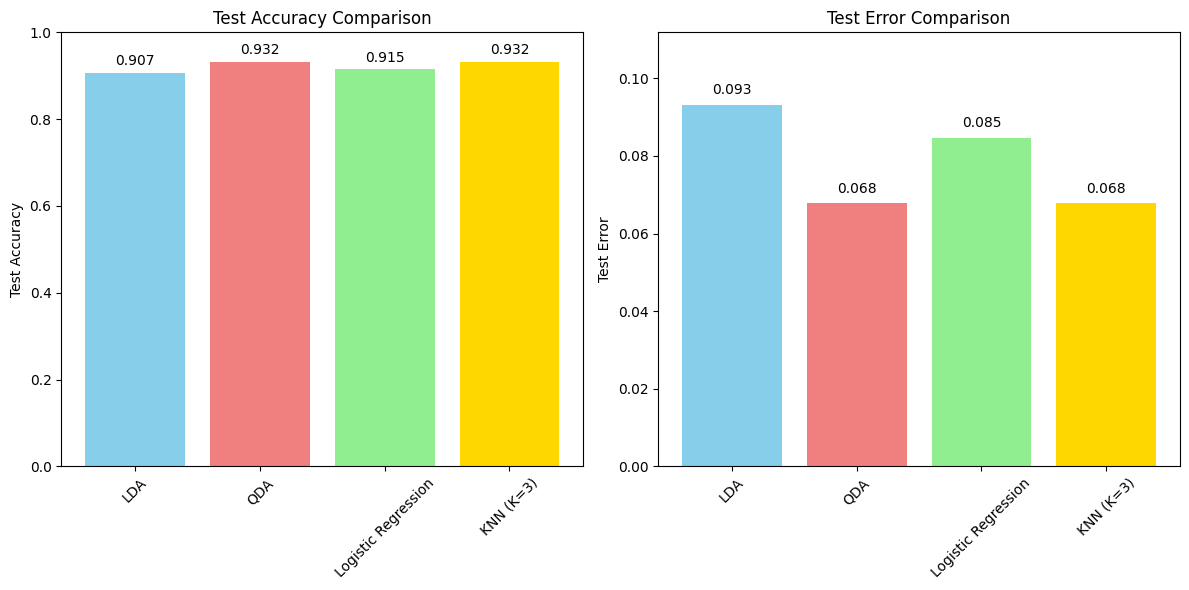

In [18]:
# Summary of all methods
methods = ['LDA', 'QDA', 'Logistic Regression', f'KNN (K={best_k})']
test_errors = [test_error_lda, test_error_qda, test_error_logistic, 1-best_accuracy]
test_accuracies = [test_accuracy_lda, test_accuracy_qda, test_accuracy_logistic, best_accuracy]

# Create comparison table
comparison_df = pd.DataFrame({
    'Method': methods,
    'Test Accuracy': test_accuracies,
    'Test Error': test_errors
})

print("Method Comparison:")
print("=" * 50)
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Find best method
best_method_idx = np.argmax(test_accuracies)
best_method = methods[best_method_idx]
best_method_accuracy = test_accuracies[best_method_idx]

print(f"\nBest performing method: {best_method}")
print(f"Best test accuracy: {best_method_accuracy:.4f}")
print(f"Best test error: {test_errors[best_method_idx]:.4f}")

# Visualization
plt.figure(figsize=(12, 6))

# Test Accuracy Comparison
plt.subplot(1, 2, 1)
bars1 = plt.bar(methods, test_accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars1, test_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# Test Error Comparison
plt.subplot(1, 2, 2)
bars2 = plt.bar(methods, test_errors, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylabel('Test Error')
plt.title('Test Error Comparison')
plt.xticks(rotation=45)
plt.ylim(0, max(test_errors) * 1.2)

# Add value labels on bars
for bar, err in zip(bars2, test_errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
             f'{err:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

---

## **`Chapter 5: Resampling Methods`**

### `Exercise 5.4: Bootstrap Method`

Demonstrates how to use bootstrap sampling to estimate the standard error of a sample mean
Compares bootstrap estimates with theoretical values
Includes visualization of the bootstrap distribution

ISLP EXERCISES SOLUTIONS

CHAPTER 5: RESAMPLING METHODS
------------------------------

Exercise 4: Bootstrap Method
Estimating standard error of sample mean using bootstrap
Original sample mean: -0.1038
Bootstrap standard error: 0.0881
Theoretical standard error: 0.0904
Difference: 0.0022


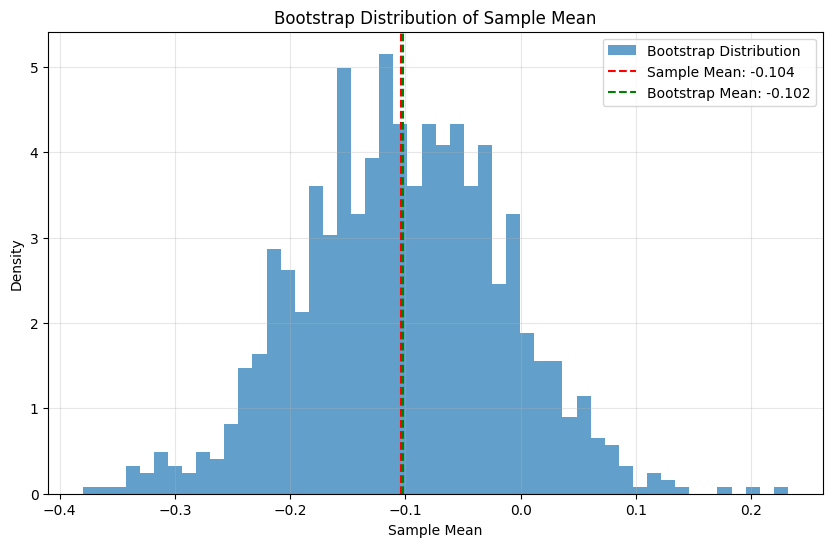

In [19]:
# Set random seed for reproducibility
np.random.seed(42)

print("ISLP EXERCISES SOLUTIONS")
print("=" * 50)

# ===============================
# CHAPTER 5: RESAMPLING METHODS
# ===============================

print("\nCHAPTER 5: RESAMPLING METHODS")
print("-" * 30)

# Exercise 4: Bootstrap method to estimate standard error
print("\nExercise 4: Bootstrap Method")
print("Estimating standard error of sample mean using bootstrap")

# Generate sample data
n = 100
data = np.random.normal(0, 1, n)
sample_mean = np.mean(data)

# Bootstrap function
def bootstrap_sample_mean(data, n_bootstrap=1000):
    """
    Bootstrap method to estimate standard error of sample mean
    """
    bootstrap_means = []
    n = len(data)
    
    for i in range(n_bootstrap):
        # Sample with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    return np.array(bootstrap_means)

# Perform bootstrap
bootstrap_means = bootstrap_sample_mean(data, 1000)
bootstrap_se = np.std(bootstrap_means)
theoretical_se = np.std(data) / np.sqrt(len(data))

print(f"Original sample mean: {sample_mean:.4f}")
print(f"Bootstrap standard error: {bootstrap_se:.4f}")
print(f"Theoretical standard error: {theoretical_se:.4f}")
print(f"Difference: {abs(bootstrap_se - theoretical_se):.4f}")

# Plot bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=50, alpha=0.7, density=True, label='Bootstrap Distribution')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.3f}')
plt.axvline(np.mean(bootstrap_means), color='green', linestyle='--', 
           label=f'Bootstrap Mean: {np.mean(bootstrap_means):.3f}')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of Sample Mean')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*50)

### `Exercise 5.9: Cross-Validation`

Uses cross-validation to select optimal polynomial degree
Demonstrates model selection using k-fold cross-validation
Shows how to avoid overfitting by choosing the right model complexity


Exercise 9: Cross-Validation for Model Selection
Comparing different polynomial degrees using cross-validation
Optimal polynomial degree: 2
Cross-validation MSE for optimal degree: 0.2125


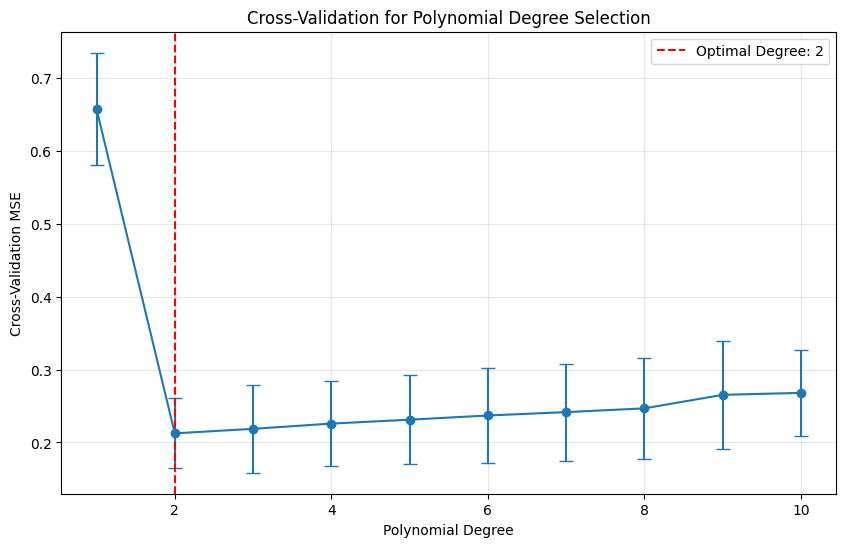

In [20]:
# Exercise 9: Cross-validation for model selection

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

print("\nExercise 9: Cross-Validation for Model Selection")
print("Comparing different polynomial degrees using cross-validation")

# Generate polynomial data
np.random.seed(42)
n = 100
x = np.random.uniform(-2, 2, n)
# True relationship: quadratic with noise
y = 0.5 * x**2 + 0.3 * x + np.random.normal(0, 0.5, n)

# Create polynomial features
def create_polynomial_features(x, degree):
    """Create polynomial features up to given degree"""
    X = np.column_stack([x**i for i in range(1, degree + 1)])
    return X

# Cross-validation for different polynomial degrees
degrees = range(1, 11)
cv_scores = []
cv_stds = []

for degree in degrees:
    X_poly = create_polynomial_features(x, degree)
    
    # Perform 5-fold cross-validation
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    
    cv_scores.append(-scores.mean())  # Convert back to positive MSE
    cv_stds.append(scores.std())

# Find optimal degree
optimal_degree = degrees[np.argmin(cv_scores)]

print(f"Optimal polynomial degree: {optimal_degree}")
print(f"Cross-validation MSE for optimal degree: {min(cv_scores):.4f}")

# Plot cross-validation results
plt.figure(figsize=(10, 6))
plt.errorbar(degrees, cv_scores, yerr=cv_stds, marker='o', capsize=5)
plt.axvline(optimal_degree, color='red', linestyle='--', 
           label=f'Optimal Degree: {optimal_degree}')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation MSE')
plt.title('Cross-Validation for Polynomial Degree Selection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## **`Chapter 6: Linear Model Selection and Regularization`**

### `Exercise 6.4: Ridge Regression`

Implements Ridge regression with various regularization parameters (λ)
Shows the bias-variance tradeoff
Finds optimal λ using validation set approach



CHAPTER 6: LINEAR MODEL SELECTION AND REGULARIZATION
--------------------------------------------------

Exercise 4: Ridge Regression
Comparing Ridge regression with different lambda values
Optimal lambda: 0.0193
Minimum test MSE: 0.0191


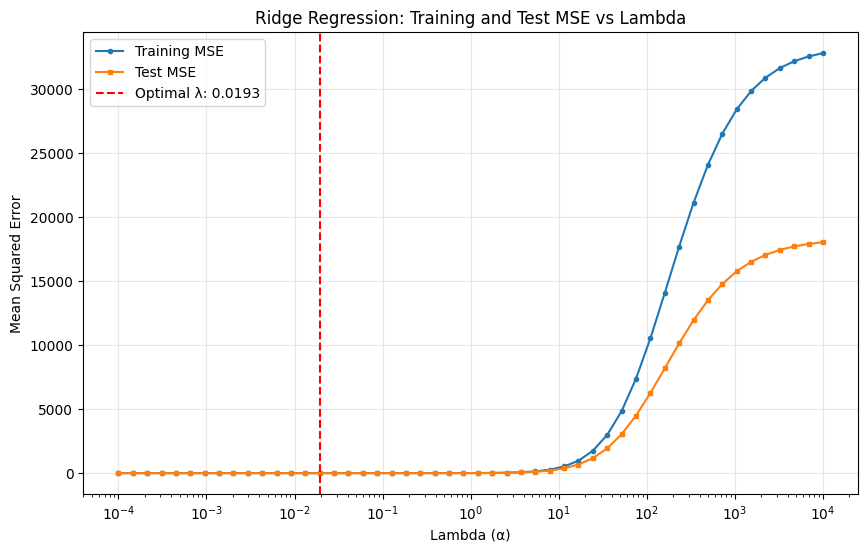

In [21]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

print("\n\nCHAPTER 6: LINEAR MODEL SELECTION AND REGULARIZATION")
print("-" * 50)

# Exercise 4: Ridge Regression
print("\nExercise 4: Ridge Regression")
print("Comparing Ridge regression with different lambda values")

# Generate high-dimensional data
np.random.seed(42)
n_samples, n_features = 100, 20
X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                      noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression with different lambda values
lambda_values = np.logspace(-4, 4, 50)
train_mse = []
test_mse = []

for lam in lambda_values:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)
    
    # MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Find optimal lambda
optimal_lambda = lambda_values[np.argmin(test_mse)]
min_test_mse = min(test_mse)

print(f"Optimal lambda: {optimal_lambda:.4f}")
print(f"Minimum test MSE: {min_test_mse:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, train_mse, label='Training MSE', marker='o', markersize=3)
plt.semilogx(lambda_values, test_mse, label='Test MSE', marker='s', markersize=3)
plt.axvline(optimal_lambda, color='red', linestyle='--', 
           label=f'Optimal λ: {optimal_lambda:.4f}')
plt.xlabel('Lambda (α)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Training and Test MSE vs Lambda')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*50)

### `Exercise 6.9: Lasso Regression`

Demonstrates Lasso's automatic feature selection capability
Compares different λ values and their effect on feature selection
Shows how Lasso can identify truly important features


Exercise 9: Lasso Regression and Feature Selection
Using Lasso for automatic feature selection
Optimal lambda: 0.0160
Minimum test MSE: 0.0123
Number of selected features: 16
Selected feature indices: [ 4  7 11 12 13 16 20 22 27 28 30 37 45 46 48 49]


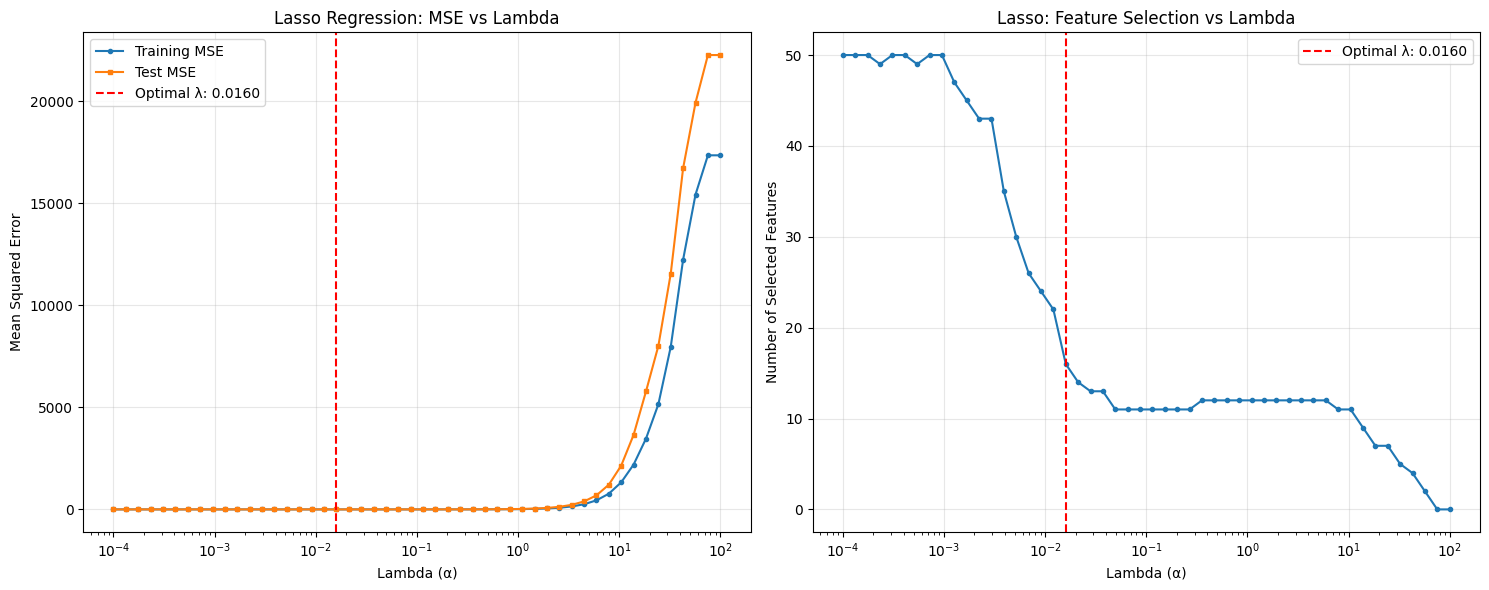


Comparison:
Ridge (optimal λ=0.0193): Test MSE = 0.0191
Lasso (optimal λ=0.0160): Test MSE = 0.0123
Lasso selected 16 out of 50 features


In [22]:
# Exercise 9: Lasso Regression and Feature Selection
print("\nExercise 9: Lasso Regression and Feature Selection")
print("Using Lasso for automatic feature selection")

# Generate data with some irrelevant features
np.random.seed(42)
n_samples, n_features = 100, 50
n_informative = 10  # Only 10 features are actually informative

X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                      n_informative=n_informative, noise=0.1, random_state=42)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso regression with different lambda values
lambda_values = np.logspace(-4, 2, 50)
train_mse_lasso = []
test_mse_lasso = []
n_features_selected = []

for lam in lambda_values:
    lasso = Lasso(alpha=lam, max_iter=1000)
    lasso.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred = lasso.predict(X_test_scaled)
    
    # MSE
    train_mse_lasso.append(mean_squared_error(y_train, y_train_pred))
    test_mse_lasso.append(mean_squared_error(y_test, y_test_pred))
    
    # Number of selected features (non-zero coefficients)
    n_features_selected.append(np.sum(np.abs(lasso.coef_) > 1e-10))

# Find optimal lambda
optimal_lambda_lasso = lambda_values[np.argmin(test_mse_lasso)]
min_test_mse_lasso = min(test_mse_lasso)

print(f"Optimal lambda: {optimal_lambda_lasso:.4f}")
print(f"Minimum test MSE: {min_test_mse_lasso:.4f}")

# Fit final model with optimal lambda
final_lasso = Lasso(alpha=optimal_lambda_lasso, max_iter=1000)
final_lasso.fit(X_train_scaled, y_train)
selected_features = np.where(np.abs(final_lasso.coef_) > 1e-10)[0]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected feature indices: {selected_features}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MSE plot
ax1.semilogx(lambda_values, train_mse_lasso, label='Training MSE', marker='o', markersize=3)
ax1.semilogx(lambda_values, test_mse_lasso, label='Test MSE', marker='s', markersize=3)
ax1.axvline(optimal_lambda_lasso, color='red', linestyle='--', 
           label=f'Optimal λ: {optimal_lambda_lasso:.4f}')
ax1.set_xlabel('Lambda (α)')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Lasso Regression: MSE vs Lambda')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Feature selection plot
ax2.semilogx(lambda_values, n_features_selected, marker='o', markersize=3)
ax2.axvline(optimal_lambda_lasso, color='red', linestyle='--', 
           label=f'Optimal λ: {optimal_lambda_lasso:.4f}')
ax2.set_xlabel('Lambda (α)')
ax2.set_ylabel('Number of Selected Features')
ax2.set_title('Lasso: Feature Selection vs Lambda')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare Ridge vs Lasso
print(f"\nComparison:")
print(f"Ridge (optimal λ={optimal_lambda:.4f}): Test MSE = {min_test_mse:.4f}")
print(f"Lasso (optimal λ={optimal_lambda_lasso:.4f}): Test MSE = {min_test_mse_lasso:.4f}")
print(f"Lasso selected {len(selected_features)} out of {n_features} features")